<a href="https://colab.research.google.com/github/KARTIKPARATKAR/MACHINE-LEARNING-WORK/blob/main/HousePricePredictionUsingRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Link-**https://github.com/KARTIKPARATKAR/MACHINE-LEARNING-WORK/blob/main/BostonHousing.csv

**Problem Statement-**

We have a boston house dataset in which we have to predict the price of a based based of the features or data available with us. Here we will be redicting a continuous value so this is a regression type of problem. For implementing this we can use different Regression Machine Learninig algorithms.

**Workflow-**

House Price Data ----> Data Pre-Processing ---->Data Analysis -----> Train Test Split -----> Regression ML Algorithms -----> Evaluation(Mean Squared Error)

**NOTE:** For evaluating a Regression type of Machine Learning Model,We will generally use R2 _score and Mean_Absolute_Error.

**R2_score** tells how well your regression model fits the actual data. Best value of R2_score is 1 and it might take value in the range of (-infinity,1]

**Mean_Absolute_Error** measures the average absolute difference between actual and predicted values. It gives the idea of much error your model has in absolute terms.

In [41]:
#Importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [42]:
#Importing Boston House Price Dataset
boston=pd.read_csv("/content/BostonHousing.csv")

In [43]:
print(boston)  #Visualizing the dataset

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

In [44]:
boston.shape #Checking how many rows and columns

(506, 13)

In [45]:
#Check for missing values in all the columns
boston.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [46]:
boston.describe()  #This will give different ststistical measures of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [47]:
#Checking what kind of co-relation our datset has- Whether it is positive or negative corelation.
#Corelation means relationship between two variables
#+ve corelation = One variable increases, another variable also increase
#-ve corelation = One variable increases, another variable also increase
correlation = boston.corr()

<Axes: >

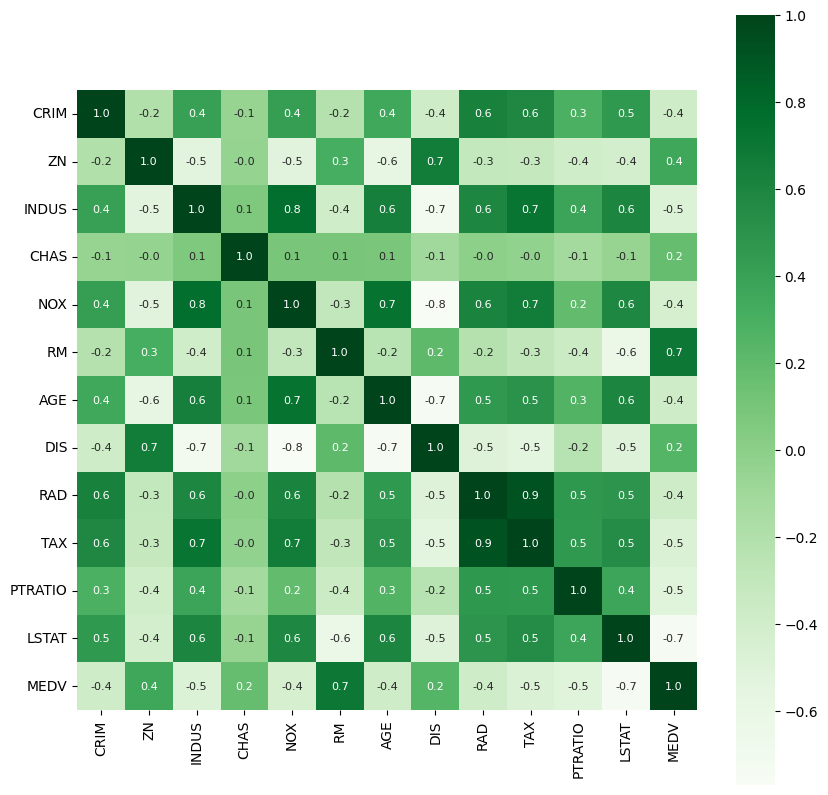

In [48]:
#Constructing heat-map to draw a correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')
#cbar means we want color bar in the side which indicates the value for each color range from faint to dark
#fmt means how many floating values we want after integer
#annot means give the name of columns in a heatmap
#

In [49]:
print(boston) #We want MEDV name as Price

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

In [50]:
boston.rename(columns={"MEDV": "Price"}, inplace=True) #Changing the column name


In [51]:
print(boston) #Name of the column is changed.

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  Price  
0       15.3   4.98   24.0  
1       17.8   9.14   21.6  
2       17.8   4.03   34.7  
3      

In [52]:
#Splitting the data and target that we have to predict
x = boston.drop('Price',axis = 1)
y = boston['Price']

In [53]:
print(x) #With this x-data we will be training the model

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.7   2.94  
4       18.7 

In [54]:
print(y) #y data we have to predict

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


In [55]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
#test_size is 0.2 means 20% data will be used for testing and 80% data will be used for training
#random_state = 2 means everytime you split the data , it will be splitted in the same way.

In [56]:
print(x.shape,x_train.shape,x_test.shape) #This gives how many dtapoints will be used for testing and training among available datapoints

(506, 12) (404, 12) (102, 12)


**XGBoost Model Training-**

In [57]:
#We will use xgboost regressor model
#Loading the model in variable "xgmodelxg"
from xgboost import XGBRegressor
xgmodel = XGBRegressor()

In [58]:
#Traininig the model with x_train
xgmodel.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
#Prediction on training data
#Accuracy for prediction on training dat
training_data_prediction = xgmodel.predict(x_train)

In [60]:
#R-quared Error
score_1 = metrics.r2_score(y_train,training_data_prediction)

In [61]:
#Mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

In [62]:
print("R squared error for trainng data : ",score_1)
print("Mean absolute error training data: ",score_2)
#For the model to perform very good,we should get less values for R-Squared_Error
#and Mean Absolute Error. If values goes to 5,6,7 or near to 10.
#Then our model is not predicting correctly.

R squared error for trainng data :  0.9999958345837003
Mean absolute error training data:  0.013156773784373105


In [63]:
#We need to find the accuracy or evaluate the model for testing data as well.
testing_data_prediction = xgmodel.predict(x_test)
score_1 = metrics.r2_score(y_test,testing_data_prediction)
score_2 = metrics.mean_absolute_error(y_test,testing_data_prediction)
print("R squared error for testing data: ",score_1)
print("Mean absolute error for testing data: ",score_2)

R squared error for testing data:  0.9027156517833855
Mean absolute error for testing data:  2.0606432849285645


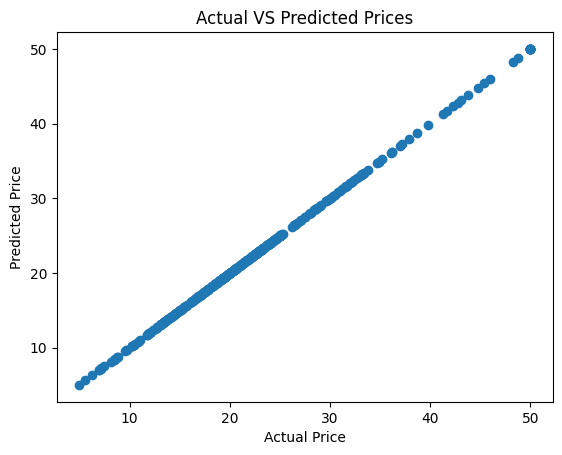

In [64]:
#Visualizing the actual price and predicted prices
plt.scatter(y_train , training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted Prices')
plt.show()

In [65]:
#Creating a predictive system
#For using this predictive system,you will have to copy the data from dataset
#and paste it in input_data section.

input_data = (0.75026,0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21,16.3)

#Change input data into numpy array as the input data is comma separated values(CSV)
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xgmodel.predict(input_data_reshaped)
print("Price of the house is:",prediction)



Price of the house is: [15.415537]


**Linear Regression Model Traininig-**



In [66]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(x_train, y_train)
testing_data_prediction = linearmodel.predict(x_test)
score_1 = metrics.r2_score(y_test,testing_data_prediction)
score_2 = metrics.mean_absolute_error(y_test,testing_data_prediction)
print("R squared error for testing data: ",score_1)
print("Mean absolute error for testing data: ",score_2)


R squared error for testing data:  0.7898820452609465
Mean absolute error for testing data:  3.099938213291377


In [67]:
#Creating a predictive system
#For using this predictive system,you will have to copy the data from dataset
#and paste it in input_data section.

input_data = (0.75026,0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21,16.3)

#Change input data into numpy array as the input data is comma separated values(CSV)
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = linearmodel.predict(input_data_reshaped)
print("Price of the house is:",prediction)

Price of the house is: [15.70584168]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Ridge Regression Model Training-**

In [68]:
from sklearn.linear_model import Ridge

ridgemodel = Ridge(alpha=1.0) #Alpha value adjust the regularization strength
ridgemodel.fit(x_train, y_train)
testing_data_prediction = ridgemodel.predict(x_test)
score_1 = metrics.r2_score(y_test,testing_data_prediction)
score_2 = metrics.mean_absolute_error(y_test,testing_data_prediction)
print("R squared error for testing data: ",score_1)
print("Mean absolute error for testing data: ",score_2)

R squared error for testing data:  0.7856678565119624
Mean absolute error for testing data:  3.1308557460815356


In [69]:
#Creating a predictive system
#For using this predictive system,you will have to copy the data from dataset
#and paste it in input_data section.

input_data = (0.75026,0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21,16.3)

#Change input data into numpy array as the input data is comma separated values(CSV)
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = ridgemodel.predict(input_data_reshaped)
print("Price of the house is:",prediction)

Price of the house is: [15.92909212]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


**Lasso Regression Model Training-**

In [70]:
from sklearn.linear_model import Lasso

lassomodel = Ridge(alpha=0.1) #Alpha value adjust the regularization strength
lassomodel.fit(x_train, y_train)
testing_data_prediction = lassomodel.predict(x_test)
score_1 = metrics.r2_score(y_test,testing_data_prediction)
score_2 = metrics.mean_absolute_error(y_test,testing_data_prediction)
print("R squared error for testing data: ",score_1)
print("Mean absolute error for testing data: ",score_2)

R squared error for testing data:  0.7895031354885782
Mean absolute error for testing data:  3.0998461602053538


In [71]:
#Creating a predictive system
#For using this predictive system,you will have to copy the data from dataset
#and paste it in input_data section.

input_data = (0.75026,0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21,16.3)

#Change input data into numpy array as the input data is comma separated values(CSV)
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = ridgemodel.predict(input_data_reshaped)
print("Price of the house is:",prediction)

Price of the house is: [15.92909212]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


**Decision Tress Model Training-**



In [72]:
from sklearn.tree import DecisionTreeRegressor

dtmodel = Ridge(alpha=0.1) #Alpha value adjust the regularization strength
dtmodel.fit(x_train, y_train)
testing_data_prediction = dtmodel.predict(x_test)
score_1 = metrics.r2_score(y_test,testing_data_prediction)
score_2 = metrics.mean_absolute_error(y_test,testing_data_prediction)
print("R squared error for testing data: ",score_1)
print("Mean absolute error for testing data: ",score_2)

R squared error for testing data:  0.7895031354885782
Mean absolute error for testing data:  3.0998461602053538


In [73]:
#Creating a predictive system
#For using this predictive system,you will have to copy the data from dataset
#and paste it in input_data section.

input_data = (0.75026,0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21,16.3)

#Change input data into numpy array as the input data is comma separated values(CSV)
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dtmodel.predict(input_data_reshaped)
print("Price of the house is:",prediction)

Price of the house is: [15.742807]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


**Random Forest Regression Model-**

In [74]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=50, random_state=42)
#n_estimizer specifies the number of decision trees in the random forest
#random_state controls the randomness of the algorithm to ensure reproducibility
rfmodel.fit(x_train, y_train)
testing_data_prediction = rfmodel.predict(x_test)
score_1 = metrics.r2_score(y_test,testing_data_prediction)
score_2 = metrics.mean_absolute_error(y_test,testing_data_prediction)
print("R squared error for testing data: ",score_1)
print("Mean absolute error for testing data: ",score_2)

R squared error for testing data:  0.8831535374529181
Mean absolute error for testing data:  2.1967450980392154


In [75]:
#Creating a predictive system
#For using this predictive system,you will have to copy the data from dataset
#and paste it in input_data section.

input_data = (0.75026,0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21,16.3)

#Change input data into numpy array as the input data is comma separated values(CSV)
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfmodel.predict(input_data_reshaped)
print("Price of the house is:",prediction)

Price of the house is: [15.634]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
